# EDA (downloaded document corpus) for 'debiaser' data product
#### Sagar Setru, September 21th, 2020

## Brief description using CoNVO framework

### Context

Some people are eager to get news from outside of their echo chamber. However, they do not know where to go outside of their echo chambers, and may also have some activation energy when it comes to seeking information from other sources. In the meantime, most newsfeeds only push you content that you agree with. You end up in an echo chamber, but may not have ever wanted to be in one in the first place.

### Need

A way to find news articles from different yet reliable media sources.

### Vision

Debiaser, a data product (maybe Chrome plug-in?) that will recommend news articles similar in topic to the one currently being read, but from several pre-curated and reliable news media organizations across the political spectrum, for example, following the "media bias chart" here https://www.adfontesmedia.com/ or the "media bias ratings" here: https://www.allsides.com/media-bias/media-bias-ratings. The app will determine the main topics of the text of a news article, and then show links to similar articles from other news organizations.

The product will generate topics for a given document via latent Dirichlet allocation (LDA) and then search news websites for the topic words generated.

Caveats: Many of these articles may be behind paywalls. News aggregators already basically do this. How different is this than just searching Google using the title of an article?

### Outcome

People who are motivated to engage in content outside of their echo chambers have a tool that enables them to quickly find news similar to what they are currently reading, but from a variety of news organizations.

### EDA of news articles database
News articles taken from here: https://components.one/datasets/all-the-news-articles-dataset/

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# make sure I'm in the right environment (should be 'insight')
print('Conda environment:')
print(os.environ['CONDA_DEFAULT_ENV'])

Conda environment:
insight


In [3]:
# get the entire news csv into data frame

# get file name
fname = './all_the_news/all_the_news_db.csv'

# load into data frame
all_news_df = pd.read_csv(fname)

/Users/sagarsetru/anaconda3/envs/insight/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0,1,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
all_news_df.head()

,index,id,title,author,date,content,year,month,publication,category,digital,section,url
0,0,1,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
1,1,2,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
2,2,3,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
3,3,4,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
4,4,5,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN


In [5]:
# show columns
print(all_news_df.columns)

Index(['index', 'id', 'title', 'author', 'date', 'content', 'year', 'month',
       'publication', 'category', 'digital', 'section', 'url'],
      dtype='object')


In [6]:
# show descriptions
all_news_df.describe()

,year,month,digital
count,191530.000000,191530.000000,193115.000000
mean,2016.312374,5.723589,1.060435
std,0.833314,3.467818,1.200331
min,2000.000000,1.000000,0.000000
25%,2016.000000,3.000000,0.000000
50%,2016.000000,5.000000,1.000000
75%,2017.000000,9.000000,1.000000
max,2018.000000,12.000000,4.000000


In [7]:
# determine number of nan
all_news_df.isnull().sum()

index               0
id                  0
title               5
author          54071
date            34274
content         37072
year            34274
month           34274
publication     29384
category        57091
digital         32689
section        151232
url            127008
dtype: int64

In [8]:
# remove articles that are nan
all_news_df = all_news_df[pd.notnull(all_news_df['content'])]

In [9]:
all_news_df.isnull().sum()

index               0
id                  0
title               3
author          19967
date             4422
content             0
year             4422
month            4422
publication         4
category        26607
digital          3268
section        117336
url             97449
dtype: int64

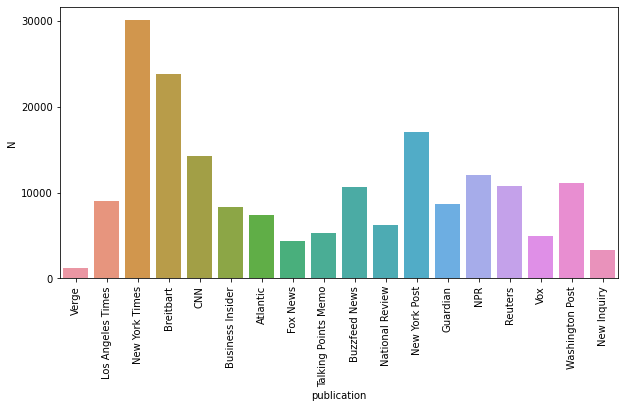

<Figure size 432x288 with 0 Axes>

In [10]:
# plot histograms of data across publications

plt.figure(figsize=(10,5));
sns.countplot(all_news_df['publication'])
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.show();
plt.clf();

We see a decent distribution of data across news media organizations and also across the political spectrum.

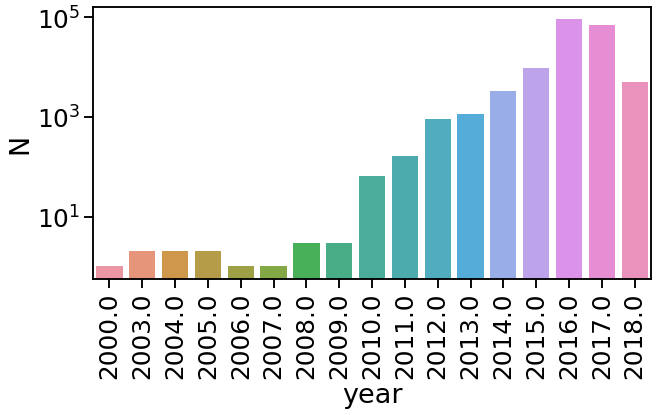

<Figure size 432x288 with 0 Axes>

In [11]:
# plot histograms across year published

plt.figure(figsize=(10,5));
sns.countplot(all_news_df['year'])
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.yscale('log')
plt.show();
plt.clf()

Articles are mostly from 2015 to 2018. There are some older articles. This may make topic modeling of older news difficult.

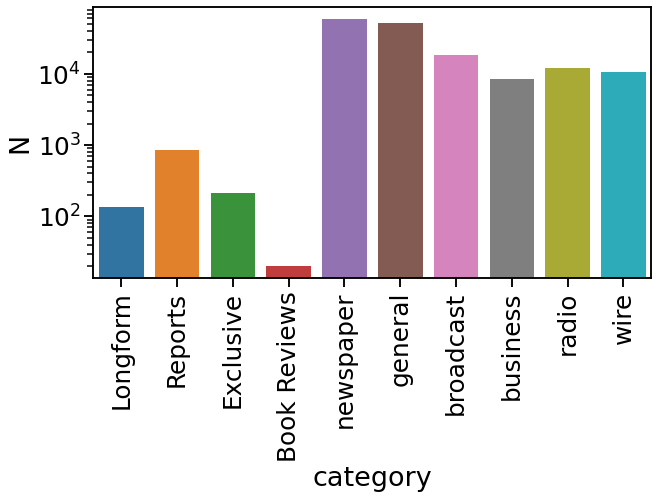

<Figure size 432x288 with 0 Axes>

In [12]:
# plot histograms across type/category of article

plt.figure(figsize=(10,5));
sns.countplot(all_news_df['category'])
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.yscale('log')
plt.show();
plt.clf()

There are pletny of news paper articles. The radio component is interesting. What is that?

In [13]:
radio_news = all_news_df.loc[all_news_df['category'] == 'radio']

radio_news.head()


,index,id,title,author,date,content,year,month,publication,category,digital,section,url
126586,126586,160641,"Thanks To Russia, 2016 Isn't Really Going To E...",Ron Elving,2016-12-31,"[In the Washington of 2016, even when the poli...",2016.0,12.0,NPR,radio,3.0,NaN,http://www.npr.org/2016/12/31/507596704/for-tr...
126587,126587,160642,Trump Tweets Give A Glimpse Into Foreign Polic...,Jessica Taylor,2016-12-28,[President-elect Donald Trump has used Twitter...,2016.0,12.0,NPR,radio,3.0,NaN,http://www.npr.org/2016/12/28/507284226/trump-...
126588,126588,160643,"As U.S. Confronts Russia, Trump's Admiration O...",Arnie Seipel,2016-12-30,[President-elect Donald Trump is unabashedly p...,2016.0,12.0,NPR,radio,3.0,NaN,http://www.npr.org/2016/12/30/507584595/as-u-s...
126589,126589,160644,Putin Says Russia Won't Expel Diplomats In Res...,Camila Domonoske,2016-12-30,"[Updated at 2:50 p.m. ET, Russian President Vl...",2016.0,12.0,NPR,radio,3.0,thetwo-way,http://www.npr.org/sections/thetwo-way/2016/12...
126590,126590,160645,(Some Of) Our Favorite Visual Stories of 2016,Ariel Zambelich,2016-12-31,"[From photography, illustration and video, to ...",2016.0,12.0,NPR,radio,3.0,NaN,http://www.npr.org/2016/12/31/507590770/-some-...


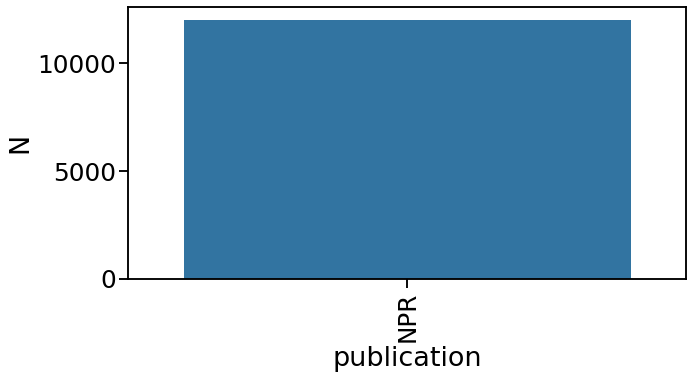

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(10,5));
sns.countplot(radio_news['publication'])
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.show();
plt.clf();

The radio news is entirely "NPR". Interesting. Let's look at an article to get a sense of whether it is transcribed from an interview or an NPR news article.

In [15]:
radio_news.iloc[1,5]

'[President-elect Donald Trump has used Twitter — his preferred means of communication — to weigh in on a swath of foreign policy issues over the past few weeks., His comments give a glimpse into how his incoming administration will deal with pressing foreign matters — but also highlight how reactionary comments on social media can immediately spur international concern and attention. And his staff has indicated that taking to Twitter to air his concerns or, often, grievances, won\'t end once he enters the Oval Office., On Wednesday, Trump blasted the U.S.\'s abstention from the U.N. Security Council vote on Israeli settlements earlier this month., , The tweets came just hours before Secretary of State John Kerry gave a speech defending the decision and calling the continued building of settlements on Palestinian territory in the West Bank a threat to the two-state solution in the region., Trump\'s support for Israel and Prime Minister Benjamin Netanyahu — who has had a fraught relatio

Is this transcribed from a radio recording or a news article from NPR? A quick Google search verifies it is a news article. I think it is certainly okay to include this.

In [16]:
# let's look at the lengths of the articles in words. first compute their lengths
all_news_df['article_length'] = all_news_df.apply(lambda x: len(x['content'].split(' ')),axis=1)
all_news_df.head()

,index,id,title,author,date,content,year,month,publication,category,digital,section,url,article_length
0,0,1,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,2121
1,1,2,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,1948
2,2,3,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,3011
3,3,4,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,3281
4,4,5,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,239


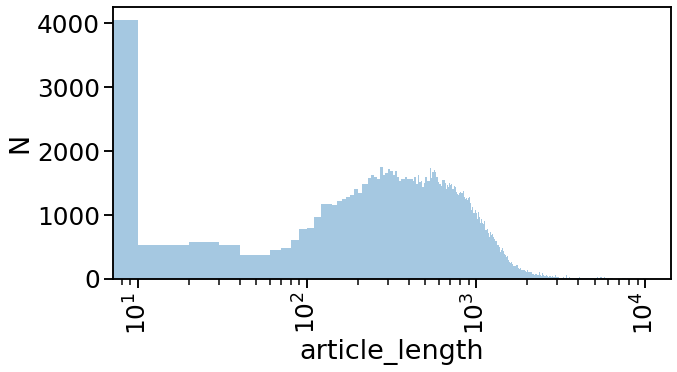

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(10,5));
sns.distplot(all_news_df['article_length'],kde=False,bins=np.arange(0,10000,10))
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.xscale('log')
plt.show();
plt.clf()

There are many short articles. I think it is fair to remove the shortest ones. We will choose a cut off of 50 words to
keep some shorter articles.

In [18]:
all_news_df = all_news_df.loc[all_news_df['article_length'] > 50]

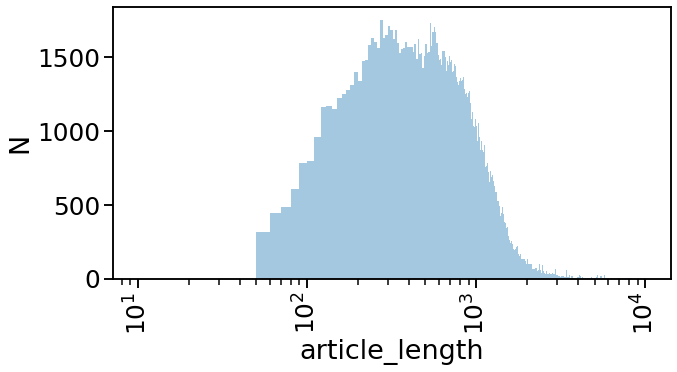

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(10,5));
sns.distplot(all_news_df['article_length'],kde=False,bins=np.arange(0,10000,10))
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.xscale('log')
plt.show();
plt.clf()

This looks like a reasonable distribution of articles to work with as the corpus.

In [20]:
all_news_df['content'].shape

(182636,)

There are ~180,000 articles in this final article corpus. Save it to a csv.

In [21]:
all_news_df.to_csv('./all_the_news/all_news_df_processed.csv', index_label='index')

### testing single document lda on these articles

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

all_news_df = pd.read_csv('./all_the_news/all_news_df_processed.csv')
all_news_df.head()

/Users/sagarsetru/anaconda3/envs/insight/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,index,index.1,id,title,author,date,content,year,month,publication,category,digital,section,url,article_length
0,0,0,1,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,2121
1,1,1,2,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,1948
2,2,2,3,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,3011
3,3,3,4,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,3281
4,4,4,5,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,239


In [23]:
# NLP Packages
import spacy
nlp  = spacy.load('en_core_web_sm')

from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

# to break articles up into sentences
from nltk import tokenize

import string

# for counting frequency of words
from collections import defaultdict

import spacy
nlp  = spacy.load('en_core_web_sm')

import pyLDAvis
import pyLDAvis.gensim

from googlesearch import search

In [52]:
import json

In [24]:
# del process_all_articles
from text_processing_functions import process_all_articles, remove_stopwords

/Users/sagarsetru/anaconda3/envs/insight/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# del process_all_articles
# process_all_articles

In [26]:
def load_stop_words_csv_to_list(full_file_name):
    """fxn that loads stop words list downloaded from git repo called 'news-stopwords'"""
    
    stop_words = pd.read_csv(full_file_name)

    stop_words = stop_words['term']

    stop_words = [word for word in stop_words]
    
    return stop_words

In [27]:
def lemmatize(raw_texts,nlp):

    'Function that lemmatizes text'

    out_text = []
    
    for text in raw_texts:
        doc = nlp(text)


        #Remove stopwords and lemmatize
        tokens = [token.lemma_ for token in doc]
        
        out_text.append(tokens)
    
    return out_text

In [28]:
def get_simple_corpus_dictionary_bow(texts,word_frequency_threshold):
    """fxn returns corpus, proc. dict, bag of words"""
    
    # Count word frequencies
    frequency = defaultdict(int)
    for text in texts:
        for token in text:
            frequency[token] += 1

    # Only keep words that appear more than set frequency, to produce the corpus
    processed_corpus = [[token for token in text if frequency[token] > word_frequency_threshold] for text in texts]
    
    # generate a dictionary via gensim
    processed_dictionary = Dictionary(processed_corpus)
    
    # generate bag of words of the corpus
    bow_corpus = [processed_dictionary.doc2bow(text) for text in processed_corpus]
    
    return processed_corpus, processed_dictionary, bow_corpus

In [29]:
def sort_topics_mean_frequency(topics,topics_mean_probs_dict,topics_std_probs_dict,topics_frequency_dict):
    """fxn returns topics sorted by their mean probability and frequency. also returns std dev of prob"""
    
    # empty dict for topics
    x_topics = []
    
    # to store mean probs
    y_means = np.zeros((len(topics_mean_probs_dict)))
    
    # to store std dev probs
    y_std = np.zeros((len(topics_std_probs_dict)))
    
    # to store frequency of topic
    y_frequencies = np.zeros((len(topics_frequency_dict)))

    # measure mean probs
    counter = -1
    for topics, mean_prob in topics_mean_probs_dict.items():
        counter += 1
        x_topics.append(topics)
        y_means[counter] = mean_prob

    # measure std dev probs
    counter2 = -1
    for topics, frequency in topics_frequency_dict.items():
        counter2 += 1
        y_frequencies[counter2] = frequency

    # measure frequency topic shows up
    counter3 = -1
    for topics, std in topics_std_probs_dict.items():
        counter3 += 1
        y_std[counter3] = std

    # sort by mean and frequency

    zipped_mean = zip(y_means, x_topics)
    sorted_zipped_mean = sorted(zipped_mean)
    y_means_sorted = [element1 for element1,element2 in sorted_zipped_mean]
    y_means_sorted = y_means_sorted[::-1]
    x_topics_means = [element2 for element1,element2 in sorted_zipped_mean]
    x_topics_means = x_topics_means[::-1]

    zipped_mean_std = zip(y_means,y_std)
    sorted_zipped_mean_std = sorted(zipped_mean_std)
    y_std_sorted = [element2 for element1,element2 in sorted_zipped_mean_std]
    y_std_sorted = y_std_sorted[::-1]

    zipped_freq = zip(y_frequencies,x_topics)
    sorted_zipped_freq = sorted(zipped_freq)
    y_freq_sorted = [element1 for (element1,element2) in sorted_zipped_freq]
    y_freq_sorted = y_freq_sorted[::-1]
    x_topics_freq = [element2 for element1,element2 in sorted_zipped_freq]
    x_topics_freq = x_topics_freq[::-1]
    
    return x_topics_means, y_means_sorted, y_std_sorted, x_topics_freq, y_freq_sorted

In [30]:
# choose list of stop words

# choose whether 1k, 10k, 100k, or nltk
which_stop_words = '1k'
# which_stop_words = '10k'
# which_stop_words = '100k'
# which_stop_words = 'nltk'

stop_words_path = '/Users/sagarsetru/Documents/post PhD positions search/insightDataScience/project/debiaser/stop_words_db/news-stopwords-master/'


if which_stop_words == '1k':
    
    # doing 1k words list
    stop_words_file_name = 'sw1k.csv'
    
    # make full file name
    stop_words_full_file_name = stop_words_path+stop_words_file_name
    
    # get list of stop words
    stop_words = load_stop_words_csv_to_list(stop_words_full_file_name)
    
elif which_stop_words == '10k':
    
    # doing 10k words list
    stop_words_file_name = 'sw10k.csv'

    # make full file name
    stop_words_full_file_name = stop_words_path+stop_words_file_name
    
    # get list of stop words
    stop_words = load_stop_words_csv_to_list(stop_words_full_file_name)

elif which_stop_words == '100k':
    
    # doing 100k
    stop_words_file_name = 'sw100k.csv'  
    
    # get full file name
    stop_words_full_file_name = stop_words_path+stop_words_file_name
    
    # get list of stop words
    stop_words = load_stop_words_csv_to_list(stop_words_full_file_name)


elif which_stop_words == 'nltk':
    # import from nltk
    from nltk.corpus import stopwords
    
    stop_words = stopwords.words('english')
    
else:
    print('Select proper variable name for "which_stop_words"')
    
# adding custom words
stop_words.append('said')
stop_words.append('youre')

In [31]:
# get a random sampling of these articles for testing single document lda

n_sample = 10

articles_df_random_subset = all_news_df.sample(n=n_sample)

In [32]:
# del preprocess_spacy

In [33]:
def entity_recognizer(raw_text,nlp):
    """Function that recognizes specific entitites, returns dictionary of them"""

    doc = nlp(raw_text)
    
    entity_dict = {}
    
    word_types = ['DATE', 'PERSON', 'ORG','MONEY','GPE']
    
    for word_type in word_types:
        entity_dict[word_type] = [entity.text for entity in doc.ents if entity.label_ in {word_type}]
#         entity_dict['PERSON'] = [entity.text for entity in doc.ents if entity.label_ in {'PERSON'}]
    
    #Remove organizations and people from documnet text
#     tokens_ner = [entity.text for entity in doc.ents if entity.label_ in {'DATE', 'PERSON', 'ORG','MONEY','GPE'}]
    
    return entity_dict

In [132]:
article_text = articles_df_random_subset.iloc[1,6]
print(article_text)

Ireland’s better-known exports include stout and summer workers for American resort communities. They have not included television shows. There are “The Fall” and the wonderful but little-watched “Moone Boy.” A few of us were fans of the dour cop in “Single-Handed.” That’s about it. So the concurrent streaming availability of two new Irish series constitutes a virtual renaissance. “Striking Out,” on Acorn TV, and “Corp + Anam,” on MHz Choice, also have the virtue of offering a stark and educational contrast. “Striking Out,” from the establishment Irish broadcaster RTE, is a glossy legal dramedy with high production values whose dialogue is in easily intelligible English. “Corp + Anam,” from the Irish-language channel TG4, is a bare-bones, lurid drama about a ruthless TV reporter whose Gaelic dialogue has to be subtitled in its own country. The four-episode “Striking Out,” already renewed, is by far the easier export, and it’s arrived here just a few months after its premiere in Ireland

In [145]:
full_path = '/Users/sagarsetru/Documents/post PhD positions search/insightDataScience/project/debiaser/article_text_files/'

full_file_names = [
full_path+'ap_hurricane_sally_unleashes_20200916.txt',
full_path+'cnn_big_ten_backtracks_20200916.txt',
full_path+'nyt_on_the_fire_line_20200915.txt',
full_path+'foxnews_snake_face_mask_20200916_v2.txt',
'/Users/sagarsetru/Documents/post PhD positions search/insightDataScience/project/debiaser/article_html_files/U.S. Stocks Lower as Fed Outlook Rattles Investors - WSJ.html'
]

from bs4 import BeautifulSoup

full_file_name = full_file_names[4]

# with open(full_file_name, 'r') as file:
#     main_article = file.read().replace('\n', ' ')
    
    
# get the html as one string
with open(full_file_name, 'r') as file:
    coverpage = file.read()

# create soup object
soup = BeautifulSoup(coverpage, 'html.parser')

# get title
headline = soup.find('h1').get_text()
print(headline)
print(' ')

# get text from all <p> tags
p_tags = soup.find_all('p')

# get text from each p tag and strip whitespace
p_tags_text = [tag.get_text().strip() for tag in p_tags]

# filter out sentences without periods
p_tags_text = [sentence for sentence in p_tags_text if '.' in sentence]

# convert all p_tags_text to single article text string

p_tags_text_1string = ''

for p_tag_text in p_tags_text:
    p_tags_text_1string += p_tag_text

main_article = p_tags_text_1string

The Wall Street Journal
 


In [146]:
main_article

"https://www.wsj.com/articles/global-stock-markets-dow-update-9-17-2020-11600334220U.S. stocks fell Thursday, hurt by weakness in the labor market as uncertainty over the coronavirus pandemic continues to weigh on hiring.The S&P 500 dropped 0.8% to 3357. The Nasdaq Composite declined 1.3% to 10910, pushing the tech-heavy index further into negative territory for the month. The Dow Jones Industrial Average snapped a four-day winning streak, closing down 0.5%, or 130 points, to 27902.The declines on Thursday included big technology companies but were broad-based, after stocks had rallied over the past several months. Investors have attributed part of those gains to action from the Federal Reserve in the early days of the pandemic.Now, they are waiting for clues on what will come next, either on the economy or action from the government.“We’ve had so many risk-on moves over the past three or four months that I think it’s a little bit of an indictment on where we stand,” said R.J. Grant,  

In [151]:
# Create a floor of the frequency of words to remove
word_frequency_threshold = 1

# choose the number of LDA topics
num_lda_topics = 5

# do by sentences
do_sentences = 1

do_plot = 0

do_print = 0

n_passes = 100

perplexity_scores = np.zeros((100,1))

for i in range(100):
    # loop through articles
    # for ind, full_file_name in enumerate(full_file_names):

    # for ind, article_text in enumerate(articles_df_random_subset['content']):
#     for ind, article_text in enumerate([articles_df_random_subset.iloc[1,6]]):
    for ind, article_text in enumerate([main_article]):




    #     if ind == 0:
    #         continue

        if do_print:
            print(article_text)

        # pull out dictionary of important entities
    #     entity_dict = entity_recognizer(article_text,nlp)

    #     if do_print:
    #         print(' ')

    #     for key in entity_dict:

    #         if do_print:
    #             print(key)
    #             print(entity_dict[key])
    #             print(' ')

    #     # replace weird apostrophes
    #     article_text = article_text.replace("`","'")
    #     article_text = article_text.replace("’","'")
    #     article_text = article_text.replace("'","'")

    #     # replace long dashes with short dashes
    #     article_text = article_text.replace("—","-")

    #     # replace short dashes with spaces
    #     article_text = article_text.replace("-"," ")

        if do_sentences:
            # break article into sentences
            article_text = tokenize.sent_tokenize(article_text)

    #         article_text = [sentence.translate(sentence.maketrans('', '', string.punctuation)) for sentence in article_text]

            # process article
            article_processed = process_all_articles(article_text,nlp)

            # remove stopwords
            article_processed = remove_stopwords(article_processed,stop_words)

            # following https://radimrehurek.com/gensim/auto_examples/core/run_core_concepts.html#sphx-glr-auto-examples-core-run-core-concepts-py
            # Lowercase each document, split it by white space and filter out stopwords
    #         texts = [[word for word in document.lower().split() if word not in stop_words] 
    #                  for document in article_text]

        else:
            # get rid of punctuation
            article_text = article_text.translate(article_text.maketrans('', '', string.punctuation))

            # following https://radimrehurek.com/gensim/auto_examples/core/run_core_concepts.html#sphx-glr-auto-examples-core-run-core-concepts-py
            # Lowercase each document, split it by white space and filter out stopwords
            article_processed = [[word for word in document.lower().split() if word not in stop_words] for document in [article_text]]

        # get corpus, dictionary, bag of words
        processed_corpus, processed_dictionary, bow_corpus = get_simple_corpus_dictionary_bow(article_processed,
                                                                                              word_frequency_threshold)

        # generate the LDA model
        lda = LdaModel(corpus = bow_corpus,
                         num_topics = 5,
                         id2word = processed_dictionary,
                         passes = n_passes)

        # get the topics from the lda model
        lda_topics = lda.show_topics(formatted=False)

        # dictionary for topics and the probabilities associated with them
        topics_probs_dict = {}

        # list of unique topic names
        topics = []

        # get top words per topic
        lda_top_topic_words = ''

        # loop through each list of generated topics
        for topic in lda_topics:

            # get the list of topics
            topic_words = topic[1]

            lda_top_topic_words += ' '+topic_words[0][0]

            # loop through topic words and probabilities
            for topic_word, prob in topic_words:

                # if the word isn't already in the list of topics, add it to list of topics
                if topic_word not in topics: 
                    topics.append(topic_word)

                # if the word is not a key in the dictionary of topics to probabilities, add it to dictionary
                if topic_word not in topics_probs_dict.keys():

                    topics_probs_dict[topic_word] = np.array([prob])

                # if the word is a key in the dictionary of topics to probabilities, append probability
                else:
                    topics_probs_dict[topic_word] = np.append(topics_probs_dict[topic_word],[prob])

        # dictionary for topic probability means
        topics_mean_probs_dict = {}

        # dictionary for topic probability std devs
        topics_std_probs_dict = {}

        # dictionary for topic frequency
        topics_frequency_dict = {}

        # loop through topics and probabilities
        for topic, prob in topics_probs_dict.items():

            # update dictionary for mean probability
            topics_mean_probs_dict[topic] = np.mean(prob)

            # update dictionary for std dev probability
            topics_std_probs_dict[topic] = np.std(prob)

            # update dictionary for topic frequency
            topics_frequency_dict[topic] =  prob.size



        # get the topic mean probs and frequencies, sorted
        topics_means, means_sorted, std_sorted, topics_freq, freq_sorted = sort_topics_mean_frequency(topics,
                                                 topics_mean_probs_dict,
                                                 topics_std_probs_dict,
                                                 topics_frequency_dict)

        if do_plot:
            plt.figure(figsize=(15,5));
            plt.bar(topics_means,means_sorted,yerr=std_sorted);
            plt.ylabel('Mean probability');
            sns.set_context('talk', font_scale=1.5);
            plt.xticks(rotation=90);
            plt.show();
            plt.clf();
        #     plt.savefig('./eda_figs/mean_prob_vs_topic_big_ten_resumes.png', dpi=300, bbox_inches='tight')

            plt.figure(figsize=(15,5));
            plt.bar(topics_freq,freq_sorted);
            plt.ylabel('N');
            # plt.xlabel('Topics')
            sns.set_context('talk', font_scale=1.5);
            plt.xticks(rotation=90);
            plt.show();
            plt.clf();
            # plt.savefig('./edafigs/frequency_vs_topic_big_ten_resumes.pdf')

        if do_print:
            print(topics)
            print(topics_probs_dict)
            print(' ')

            for lda_topic in lda_topics:
                print(lda_topic)

            print(lda_top_topic_words)

    #     print(' ')
    #     if ind == 0:
    #         break
        perplexity = lda.log_perplexity(bow_corpus)
        perplexity_scores[i] = perplexity
        
        
# print('\nPerplexity: ', lda.log_perplexity(bow_corpus))

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, bow_corpus, processed_dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.145516  0.127130       1        1  25.583920
0      0.070715  0.016936       2        1  23.719514
4      0.184126  0.040503       3        1  21.149004
1     -0.058776 -0.062516       4        1  16.260589
2     -0.050549 -0.122053       5        1  13.286973, topic_info=        Term      Freq     Total Category  logprob  loglift
24     rates  2.000000  2.000000  Default  30.0000  30.0000
26   vaccine  4.000000  4.000000  Default  29.0000  29.0000
23       fed  2.000000  2.000000  Default  28.0000  28.0000
12     gains  2.000000  2.000000  Default  27.0000  27.0000
18   trading  3.000000  3.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
14       inc  0.131378  2.941322   Topic5  -4.4772  -1.0902
3        wsj  0.131375  2.999611   Topic5  -4.4772  -1.1098
8     stocks  0.131388  4.359716   Topic5  -4.4771  -1.4836
7   pandemic  0.131385  3.622001   Topic5  -4.4771  -1.2983
0        dow  0.131374  3.658998   Topic5  -4.4772  -1.3085

[195 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
19        1  0.460659          aid
19        2  0.460659          aid
28        3  0.877221         anna
29        3  0.877221        chung
4         1  0.689453  coronavirus
4         2  0.344727  coronavirus
0         2  0.546598          dow
0         3  0.273299          dow
5         1  0.448286      dropped
5         3  0.448286      dropped
11        4  0.476345       equity
11        5  0.476345       equity
23        2  0.363098          fed
23        5  0.363098          fed
25        2  0.925829       fiscal
12        4  0.924369        gains
13        2  0.462550        grant
13        4  0.462550        grant
14        2  0.339983          inc
14        3  0.339983          inc
14        4  0.339983          inc
9         3  0.877224        index
15        1  0.460298    investors
15        4  0.460298    investors
30        3  0.877221        isaac
20        1  0.916843      jobless
10        2  0.680368        jones
10        3  0.340184        jones
31        3  0.877221       juliet
16        2  0.462550          kbw
16        4  0.462550          kbw
6         1  0.686948        labor
1         2  0.476762      markets
1         5  0.476762      markets
7         1  0.552181     pandemic
7         2  0.276090     pandemic
7         4  0.276090     pandemic
24        5  0.743000        rates
21        1  0.916843     recovery
27        2  0.476730     redfield
27        5  0.476730     redfield
17        1  0.345587      reserve
17        4  0.691174      reserve
32        2  0.450416     reserved
32        3  0.450416     reserved
22        4  0.476359      sectors
22        5  0.476359      sectors
2         2  0.694516        stock
8         1  0.688118       stocks
8         2  0.229373       stocks
18        1  0.281663      trading
18        4  0.563325      trading
18        5  0.281663      trading
26        1  0.697849      vaccine
26        5  0.232616      vaccine
3         2  0.333377          wsj
3         3  0.666753          wsj, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 2, 3])

In [148]:
lda_top_topic_words

' vaccine stock wsj stocks rates'

In [149]:
print(np.mean(perplexity_scores))
print(np.std(perplexity_scores))

-4.278541365851847
0.0821454847903026


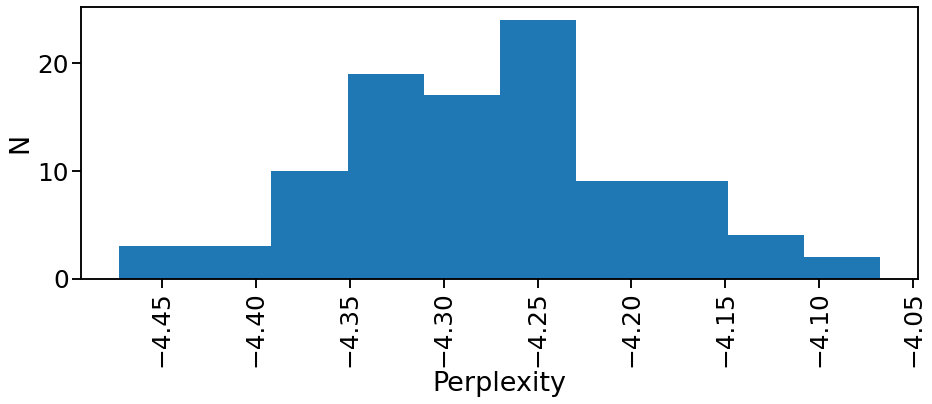

<Figure size 432x288 with 0 Axes>

In [150]:
plt.figure(figsize=(15,5));
plt.hist(perplexity_scores);
plt.ylabel('N');
plt.xlabel('Perplexity')
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.show();
plt.clf();

In [37]:
print(len(article_text))
processed_corpus, processed_dictionary, bow_corpus = get_simple_corpus_dictionary_bow(article_processed,
                                                                                          word_frequency_threshold)

17


In [94]:
# lda_top_topic_words
all_sides_domains

0         abcnews.go.com
1          aljazeera.com
2             apnews.com
3                bbc.com
4          bloomberg.com
5          breitbart.com
6       buzzfeednews.com
7                cbn.com
8            cbsnews.com
9          csmonitor.com
10               cnn.com
11     thedailybeast.com
12      democracynow.org
13         factcheck.org
14            forbes.com
15           foxnews.com
16          huffpost.com
17       motherjones.com
18             msnbc.com
19    nationalreview.com
20           nbcnews.com
21            nypost.com
22           nytimes.com
23           newsmax.com
24               npr.org
25          politico.com
26            reason.com
27           reuters.com
28             salon.com
29         spectator.org
30       theatlantic.com
31       theguardian.com
32           thehill.com
33               wsj.com
Name: domain, dtype: object

In [39]:
# load domain names from all sides media csv, write string for google search
all_sides_with_domains = pd.read_csv('./all_sides_media_data/allsides_final_plus_others_with_domains.csv')

all_sides_names = all_sides_with_domains['name']
all_sides_domains = all_sides_with_domains['domain']

all_sides_names_domains = pd.concat([all_sides_names,all_sides_domains],axis=1)

In [161]:
all_sides_names_domains

,name,domain,google_query
0,ABC News (Online),abcnews.go.com,site:nytimes.com dow trading rates vaccine wsj
1,Al Jazeera,aljazeera.com,site:bloomberg.com dow trading rates vaccine wsj
2,Associated Press,apnews.com,site:reuters.com dow trading rates vaccine wsj
3,BBC News,bbc.com,site:wsj.com dow trading rates vaccine wsj
4,Bloomberg,bloomberg.com,NaN
5,Breitbart News,breitbart.com,NaN
6,BuzzFeed News,buzzfeednews.com,NaN
7,CBN,cbn.com,NaN
8,CBS News,cbsnews.com,NaN
9,Christian Science Monitor,csmonitor.com,NaN


In [162]:
queries = []

all_sides_domains_test = ['nytimes.com','bloomberg.com','reuters.com','wsj.com']
all_sides_names_test = ['New York Times','Bloomberg','Reuters','The Wall Street Journal']
# for domain in all_sides_domains:
for domain in all_sides_domains_test:

    query = 'site:'+domain+lda_top_topic_words
    queries.append(query)
    

all_sides_names_domains['google_query'] = pd.DataFrame(queries)

In [163]:
print(queries)
print(all_sides_names_test)

['site:nytimes.com dow trading rates vaccine wsj', 'site:bloomberg.com dow trading rates vaccine wsj', 'site:reuters.com dow trading rates vaccine wsj', 'site:wsj.com dow trading rates vaccine wsj']
['New York Times', 'Bloomberg', 'Reuters', 'The Wall Street Journal']


In [164]:
# for j in search(query, tld='com', lang='en', num = 1, start = 0, stop = 1, pause = 10):
#     print(j)

In [165]:
query_results = {}

for ind, query in enumerate(queries):
    current_results = []
    
    for j in search(query, tld='com', lang='en', num = 1, start=0, stop = 5, pause = 2.0):
        current_results.append(j)
        
    query_results[all_sides_domains_test[ind]] = current_results
    
    

HTTPError: HTTP Error 429: Too Many Requests

In [158]:
print(query_results)
json_object = json.dumps(query_results, indent = 4) 
print(json_object)

{'nytimes.com': ['https://www.nytimes.com/2020/03/11/business/economy/markets-plunge-coronavirus.html', 'https://www.nytimes.com/2020/03/07/business/coronavirus-stocks.html', 'https://www.nytimes.com/2020/03/09/business/stock-market-today.html', 'https://www.nytimes.com/live/2020/09/08/business/stock-market-today-coronavirus', 'https://www.nytimes.com/2020/04/08/business/live-stock-market-coronavirus.html'], 'apnews.com': [], 'reuters.com': ['https://uk.reuters.com/article/us-dowjones-newscorp-editors-1/wsj-editors-knew-of-murdoch-offer-in-advance-report-idUSN0841610820070508', 'https://in.reuters.com/article/usa-stocks/us-stocks-sp-wobbles-on-fresh-trade-uncertainty-disney-lifts-dow-idUKL2N27T1GE', 'https://www.reuters.com/article/us-ransquawk-dowjones-hotnews-lawsuit-idUSBREA4F0FE20140516', 'https://www.reuters.com/article/uk-dowjones/dow-jones-shares-surge-above-murdochs-bid-idUKN0128371520070601', 'https://www.reuters.com/article/usa-stocks/us-stocks-dow-futures-gain-on-caterpillar

In [153]:
query_results_df = pd.DataFrame.from_dict(query_results)
query_results_df.head()

{'nytimes.com': ['https://www.nytimes.com/2019/11/18/well/mind/when-mental-illness-is-severe.html', 'https://www.nytimes.com/2013/02/03/opinion/sunday/sunday-dialogue-treating-the-mentally-ill.html', 'https://www.nytimes.com/2003/03/04/health/behavior-revising-the-script-on-mental-illness-and-violence.html', 'https://www.nytimes.com/2015/08/29/opinion/how-to-halt-the-violence-treat-mental-illness.html', 'https://www.nytimes.com/2019/12/13/nyregion/Kirby-Forensic-Psychiatric-Center.html'], 'apnews.com': ['https://apnews.com/b0b1034de6d24fd4b0dd2f9367442449', 'https://apnews.com/a9fbf8f4f0e04b02b1431fa7d414b39c', 'https://apnews.com/a2271d537dce45b597d7db5ef230558a/US:-Care-lacking-at-troubled-Washington-psychiatric-hospital', 'https://apnews.com/befb2ad037624b94a13456ba02bf7fad', 'https://apnews.com/e60b31a60d4d453bab1ddd6e7af9f3a0'], 'reuters.com': ['https://www.reuters.com/article/us-usa-shooting-mentalyill/u-s-mentally-ill-and-their-families-face-barriers-to-care-idUSBRE8BS07O2012122

,nytimes.com,apnews.com,reuters.com,wsj.com
0,https://www.nytimes.com/2019/11/18/well/mind/w...,https://apnews.com/b0b1034de6d24fd4b0dd2f93674...,https://www.reuters.com/article/us-usa-shootin...,https://www.wsj.com/articles/mental-illness-an...
1,https://www.nytimes.com/2013/02/03/opinion/sun...,https://apnews.com/a9fbf8f4f0e04b02b1431fa7d41...,https://www.reuters.com/article/us-health-ment...,https://www.wsj.com/articles/SB121297144756555917
2,https://www.nytimes.com/2003/03/04/health/beha...,https://apnews.com/a2271d537dce45b597d7db5ef23...,https://www.reuters.com/article/us-usa-shootin...,https://www.wsj.com/articles/SB100014241278873...
3,https://www.nytimes.com/2015/08/29/opinion/how...,https://apnews.com/befb2ad037624b94a13456ba02b...,https://www.reuters.com/article/us-special-fre...,https://www.wsj.com/articles/SB902183542448858500
4,https://www.nytimes.com/2019/12/13/nyregion/Ki...,https://apnews.com/e60b31a60d4d453bab1ddd6e7af...,https://www.reuters.com/article/us-yelling-par...,https://www.wsj.com/articles/SB117764101327484407


In [121]:
# Serializing json    
json_object = json.dumps(query_results, indent = 4)   
# json_object = json.dumps(topics_frequency_dict, indent = 4)
# print(json_object)  

json_object_df = query_results_df.to_json(orient='index')
print(json_object_df)
# print(all_sides_names_domains)
# all_news_df.apply(lambda x: len(x['content'].split(' ')),axis=1)

{"0":{"nytimes.com":"https:\/\/www.nytimes.com\/2019\/11\/18\/well\/mind\/when-mental-illness-is-severe.html","apnews.com":"https:\/\/apnews.com\/b0b1034de6d24fd4b0dd2f9367442449","reuters.com":"https:\/\/www.reuters.com\/article\/us-usa-shooting-mentalyill\/u-s-mentally-ill-and-their-families-face-barriers-to-care-idUSBRE8BS07O20121229?feedType=RSS&feedName=domesticNews","wsj.com":"https:\/\/www.wsj.com\/articles\/mental-illness-and-mass-murder-11564955203"},"1":{"nytimes.com":"https:\/\/www.nytimes.com\/2013\/02\/03\/opinion\/sunday\/sunday-dialogue-treating-the-mentally-ill.html","apnews.com":"https:\/\/apnews.com\/a9fbf8f4f0e04b02b1431fa7d414b39c","reuters.com":"https:\/\/www.reuters.com\/article\/us-health-mentalillness-crime-victims-idUSKCN1IX5W2","wsj.com":"https:\/\/www.wsj.com\/articles\/SB121297144756555917"},"2":{"nytimes.com":"https:\/\/www.nytimes.com\/2003\/03\/04\/health\/behavior-revising-the-script-on-mental-illness-and-violence.html","apnews.com":"https:\/\/apnews.com

In [125]:
json_object_df["0"]

TypeError: string indices must be integers

In [55]:
for ind, query in enumerate(queries):
    print(query)
    print(all_sides_names.iloc[ind])
    print(' ')

site:abcnews.go.com reverse driver vance calderazzo bikers
ABC News (Online)
 
site:aljazeera.com reverse driver vance calderazzo bikers
Al Jazeera
 
site:apnews.com reverse driver vance calderazzo bikers
Associated Press
 
site:bbc.com reverse driver vance calderazzo bikers
BBC News
 
site:bloomberg.com reverse driver vance calderazzo bikers
Bloomberg
 
site:breitbart.com reverse driver vance calderazzo bikers
Breitbart News
 
site:buzzfeednews.com reverse driver vance calderazzo bikers
BuzzFeed News
 
site:cbn.com reverse driver vance calderazzo bikers
CBN
 
site:cbsnews.com reverse driver vance calderazzo bikers
CBS News
 
site:csmonitor.com reverse driver vance calderazzo bikers
Christian Science Monitor
 
site:cnn.com reverse driver vance calderazzo bikers
CNN (Web News)
 
site:thedailybeast.com reverse driver vance calderazzo bikers
Daily Beast
 
site:democracynow.org reverse driver vance calderazzo bikers
Democracy Now
 
site:factcheck.org reverse driver vance calderazzo bikers


In [ ]:
str(lda_top_topic_words)

In [ ]:
article_text[0]